In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Proyecto-final.csv')
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim_Category,Victims_Sex,Victims_Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


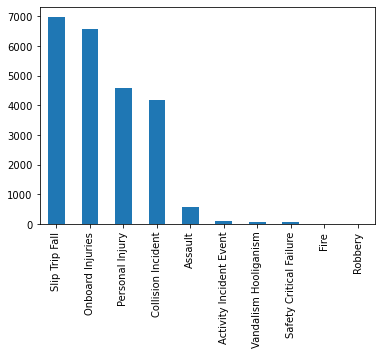

In [8]:
df['Incident Event Type'].value_counts(ascending=False).plot(kind='bar')
plt.show()

<AxesSubplot:>

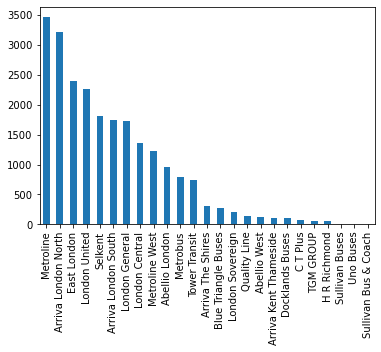

In [9]:
df['Operator'].value_counts(ascending=False).plot(kind='bar')

### Grafico por Categoria de victima 
- Excluyendo a Passenger 18 828 incidentes

<AxesSubplot:>

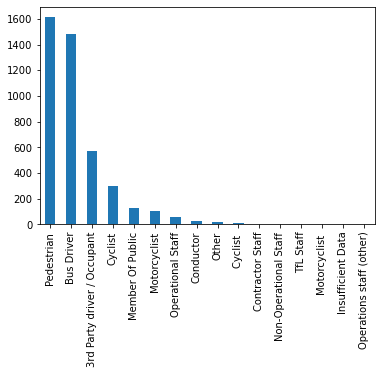

In [4]:
Q1 = df[df.Victim_Category != 'Passenger']
Q1['Victim_Category'].value_counts(ascending=False).plot(kind='bar') 

In [10]:
#df[df.Victim_Category == 'Cyclist']['Victims_Sex'].value_counts()
a = len(df[(df['Victim_Category'] == 'Cyclist')])
a

308

In [40]:
df = df[df.Victim_Category != 'Passenger'][df.Victim_Category != 'Pedestrian'][df.Victim_Category != 'Bus Driver']
category = list(set(df['Victim_Category']))
print(len(category))
sex = list(set(df['Victims_Sex']))
print(len(sex))
a0 = []
a1 = []
a2 = []
a3 = []
for a in category:
    #a.append(df[df.Victim_Category == a]['Victims_Sex'].value_counts(ascending=False))
    a0.append(len(df[(df['Victim_Category'] == a)]))
    for b in sex:
        if b == 'Male':
            a1.append(len(df[(df['Victim_Category'] == a) & (df['Victims_Sex'] == b)]))
        elif b == 'Female':
            a2.append(len(df[(df['Victim_Category'] == a) & (df['Victims_Sex'] == b)]))
        else:
            a3.append(len(df[(df['Victim_Category'] == a) & (df['Victims_Sex'] == b)]))

print(category)
a0 = tuple(a0)
a1 = tuple(a1)
a2 = tuple(a2)
print(a2)

13
3
['Motorcyclist ', 'Other', 'Contractor Staff', 'TfL Staff', 'Insufficient Data', 'Operations staff (other)', 'Member Of Public', 'Motorcyclist', 'Operational Staff', '3rd Party driver / Occupant', 'Conductor', 'Cyclist', 'Non-Operational Staff']
(0, 5, 0, 1, 0, 0, 60, 3, 7, 190, 5, 59, 0)


In [41]:
N = len(category)
menMeans = a1
womenMeans = a2
unknown = a3
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

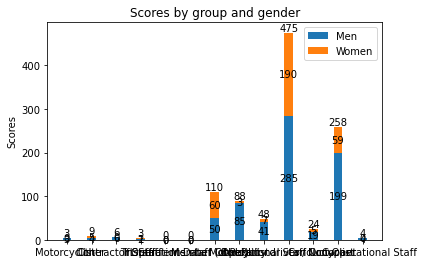

In [42]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=None, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=None, label='Women')
p3 = ax.bar(ind, unknown, width,
            bottom=womenMeans, yerr=None, label='unknown')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, labels=category)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
ax.bar_label(p3)

plt.show()